# Análise Exploratória de Dados

## Este projeto irá analisar o dados referentes aos passageiros a bordo do Titanic.

## Importando os dados do projeto `titanic-data-6.csv`.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

df_titanic = pd.read_csv('titanic-data-6.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<i>Os 5 primeiros registros do dataframe de passageiros do Titanic</i>

<h2> Perguntas e questões para EDA </h2> <br>

<ol>
    <li>Quantidade de amostras? <br>
    <li>Quantidade de colunas? <br>
    <li>Quantos passageiros a bordo e quantos sobreviventes? <br>
    <li>Qual ponto de embarque recebeu mais passageiros? <br>
    <li>Qual a relação entre ponto de embarque e status sócio-econômico? <br>
    <li>Quais fatores fizeram com que os passageiros fossem mais propensos a sobreviver?
    <ul>
        <li> Qual a relação entre status sócio-econômico e sobreviventes?
        <li> Qual ponto de embarque apresentou maior média de sobreviventes?
        <li> Qual sexo apresentou uma maior proporção de sobreviventes?
        <li> Qual a proporção e a média por faixa etária de sobreviventes?
    </ul>
</ol>

<h1> Verificação e limpeza do <i>Dataframe</i></h1>

<b> Existem dados duplicados? </b>

In [38]:
# Verifico se a soma da quantidade de linha duplicadas é 0 (zero), identificando assim se há dados duplicados ou não
if df_titanic.duplicated().sum() == 0:
    print('Não há dados duplicados.')
else:
    # Caso tenha dados duplicados, mostra o total de duplicados
    print('Existem {} dados duplicados'.format(df_titanic.duplicated().sum()))

Não há dados duplicados.


<b> Existem colunas com dados nulos? </b>

In [39]:
# Verifica se o dataframe possui dados faltantes
def checa_dados_faltantes(df):
    # Atribui, em forma de vetor, as colunas com valores faltantes ao vetor null_columns
    null_columns = df.columns[df.isnull().any()]
    # Caso não tenha colunas no vetor, então não há dados faltantes. Imprime a informação e encerra a função
    if null_columns is None:
        print('Nenhum dado faltando.')
        return
    # Se chegar neste ponto, então existe colunas com dados faltantes.
    # Para cada coluna com nulos, imprime o nome da coluna e seu respectivo total de registros nulos.
    for null_column in null_columns:
        print('Coluna "{}" faltando {} registros.'.format(null_column, df[null_column].isnull().sum()))
    
    
checa_dados_faltantes(df_titanic)

Coluna "Age" faltando 177 registros.
Coluna "Cabin" faltando 687 registros.
Coluna "Embarked" faltando 2 registros.


<b>A coluna <i>Cabin</i> contém mais que a metade do tamanho do <i>dataframe</i> em valores nulos. Como os dados de <i>Cabin</i> não serão analisados neste projeto, a coluna será deletada do conjunto.</b>

In [40]:
df_titanic.drop(labels='Cabin', axis=1, inplace=True)

<b>As colunas <i>Age</i> e <i>Embarked</i> serão analisadas, portanto as linhas com dados nulos serão descartadas.</b><br>
<i>Obs.: Poderíamos usar um método de preenchimento da média de idade para as linhas de valores nulos, mas como queremos identificar a faixa etária com maior número de sobreviventes, este método atrapalharia a amostragem.</i>

In [41]:
df_titanic.dropna(subset=['Age'], inplace=True)
df_titanic.dropna(subset=['Embarked'], inplace=True)

<h1> Análise das informações do <i>Dataframe</i> </h1>

### Quantidade de amostras?

In [42]:
print("O conjunto de dados possui {} amostras".format(df_titanic.shape[:1]))

O conjunto de dados possui (712,) amostras


### Quantidade de colunas?

In [43]:
print("O conjunto de dados possui {} colunas".format(df_titanic.shape[1:2]))

O conjunto de dados possui (11,) colunas


### Quantos passageiros a bordo e quantos sobreviventes?

In [44]:
print("Total de passageiros: {} \nTotal de sobreviventes: {}".format(
                df_titanic['Survived'].count(),
                df_titanic.query('Survived == 1')['Survived'].count()))

Total de passageiros: 712 
Total de sobreviventes: 288


### Qual ponto de embarque recebeu mais passageiros?

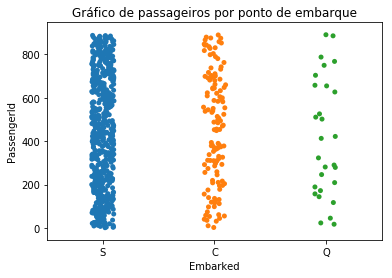

In [45]:
# Atribúo o gráfico de passageiros por ponto de embarque a passenger_by_embarked
passenger_by_embarked = sns.stripplot(x="Embarked", y="PassengerId", data=df_titanic, jitter=True)
# Seto o título e imprimo o gráfico
passenger_by_embarked.set_title("Gráfico de passageiros por ponto de embarque");

<i>O ponto de embarque S recebeu maior número de passageiros</i>

### Qual a relação entre ponto de embarque e status sócio-econômico?

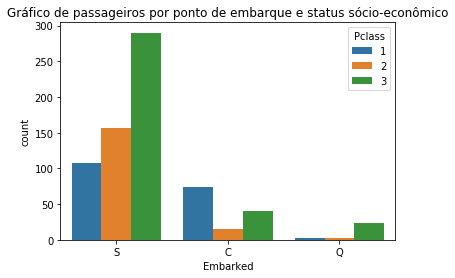

In [46]:
# Atribúo o gráfico de passageiros por ponto de embarque e status sócio-econômico a amount_embarked_by_pclass
amount_embarked_by_pclass = sns.countplot(x="Embarked", hue="Pclass", data=df_titanic)
# Seto o título e imprimo o gráfico
amount_embarked_by_pclass.set_title("Gráfico de passageiros por ponto de embarque e status sócio-econômico");

<i> O ponto de embarque S teve o maior número de passageiros embarcando nas três classes. O ponto C teve maior número de passageiros da primeira e terceira classe. Já o ponto Q recebeu, praticamente, apenas passageiros da terceira classe.</i>

## Análise para identificar quais fatores fizeram com que os passageiros fossem propensos a sobreviver

### Qual a relação entre status sócio-econômico e sobreviventes?

<b>Passageiros com maior status sócio-econômico apresentam maior proporção de sobreviventes?</b>

In [58]:
# Criando um dataframe apenas com as informações de sobreviventes, para facilitar as próximas análises
df_survived = df_titanic.query('Survived == 1')
df_survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_int,Age_int,Age_str
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,4,Adulto
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,3,Jovem
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,4,Adulto
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,1,3,Jovem
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,1,2,Adolescente


<i>Os 5 primeiros registros do dataframe de sobreviventes do Titanic</i>

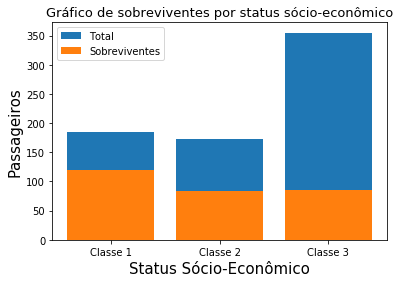

In [48]:
# Criando um gráfico sobreposto, comparando os dados totais com os de sobreviventes (df_titanic x df_survived)
plt.bar([1, 2, 3], df_titanic.groupby('Pclass')['Pclass'].count(), tick_label=['Classe 1', 'Classe 2', 'Classe 3']);
plt.bar([1, 2, 3], df_survived.groupby('Pclass')['Pclass'].count(), tick_label=['Classe 1', 'Classe 2', 'Classe 3']);
plt.title('Gráfico de sobreviventes por status sócio-econômico', fontsize=13);
# Labels para X e Y
plt.xlabel('Status Sócio-Econômico', fontsize=15);
plt.ylabel('Passageiros', fontsize=15);
# Legendas
plt.legend(['Total', 'Sobreviventes']);

<i>A classe 1 teve a maior proporção de sobreviventes, já a classe 3 apresenta a menor proporção de sobreviventes</i>

### Qual ponto de embarque apresentou maior média de sobreviventes? 

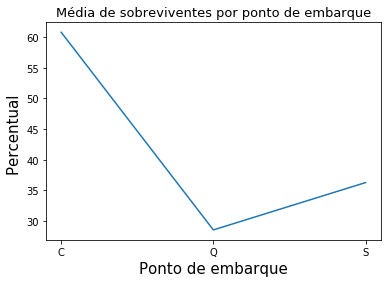

In [49]:
# Média de sobreviventes por ponto de embarque
fracs_embarked_mean = (df_titanic.groupby('Embarked').mean()['Survived'])*100

# Crio um gráfico de linha para a média de sobreviventes por faixa etária
plt.plot(fracs_embarked_mean)
plt.title('Média de sobreviventes por ponto de embarque', fontsize=13)
# Label de X e Y
plt.xlabel('Ponto de embarque', fontsize=15)
plt.ylabel('Percentual ', fontsize=15);

<i>O ponto de embarque C obteve a maior média de sobreviventes</i>

### Qual sexo apresentou maior proporção de sobreviventes?

In [50]:
# Cria um vetor de inteiros equivalente a: 0 = Masculino, 1 = Feminino
def create_sex_int_array(df_sex):
    # Vetor que será alimentado com as informações e retornado pela função
    sex_int_array = []
    # Para cada sexo no df_sexo, appenda 0 para male e 1 para o resto (female)
    for sex in df_sex:
        if sex.lower() == 'male':
            sex_int_array.append(0)
        else:
            sex_int_array.append(1)
    
    return sex_int_array

# Crio dois vetores de inteiros, um equivalente ao dataframe total (df_titanic)
sex_int = create_sex_int_array(df_titanic['Sex'])
# e outro ao dataframe de sobreviventes (df_survived)
sex_survived_int = create_sex_int_array(df_survived['Sex'])

# Cria uma nova coluna 'Sex_int' em cada dataframe
df_titanic['Sex_int'] = sex_int
df_survived['Sex_int'] = sex_survived_int

C:\Users\KassemZ\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


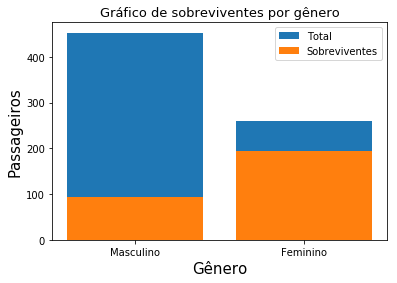

In [51]:
# label de cada barra
label_sex = ['Masculino', 'Feminino']

# Crio dois gráficos sobrepostos, comparando total de passageiros com sobreviventes por sexo
plt.bar([1, 2], df_titanic.groupby('Sex_int')['Sex_int'].count(), tick_label=label_sex)
plt.bar([1, 2], df_survived.groupby('Sex_int')['Sex_int'].count(), tick_label=label_sex)
plt.title('Gráfico de sobreviventes por gênero', fontsize=13)
# Labels para X e Y
plt.xlabel('Gênero', fontsize=15)
plt.ylabel('Passageiros', fontsize=15);
# Legendas
plt.legend(['Total', 'Sobreviventes']);

<i>Passageiros do sexo feminino tiveram a maior proporção de sobreviventes</i>

### Qual faixa etária apresentou maior proporção de sobreviventes?

<b>Considere a faixa etária da seguinte forma:</b>
    <ul>
        <i>
        <li>Criança: de 0 até 11 anos
        <li>Adolescente: 12 a 18 anos
        <li>Jovem: 19 a 30 anos
        <li>Adulto: 31 a 59 anos
        <li>Idoso: acima de 60 anos
        </i>
    </ul>

In [52]:
# Cria um vetor de acordo com 5 definições recebidas por parâmetro: 
# 1 = Criança, 2 = Adolescente, 3 = Jovem, 4 = Adulto, 5 = Idoso
def create_age_array(df_age, age_definitions):
    age_array = []
    for age in df_age:
        # Criança
        if 0 <= age <= 11:
            age_array.append(age_definitions[0])
        # Adolescente
        elif 12 <= age <= 18:
            age_array.append(age_definitions[1])
        # Jovem
        elif 19 <= age <= 30:
            age_array.append(age_definitions[2])
        # Adulto
        elif 31 < age <= 59:
            age_array.append(age_definitions[3])
        # Idoso
        else:
            age_array.append(age_definitions[4])
    
    return age_array

In [53]:
# 1 = Criança, 2 = Adolescente, 3 = Jovem, 4 = Adulto, 5 = Idoso
age_definitions = [1, 2, 3, 4, 5]

# Crio dois vetores de inteiros, um equivalente ao dataframe total (df_titanic)
age_int = create_age_array(df_titanic['Age'], age_definitions)
# e outro ao dataframe de sobreviventes (df_survived)
age_survived_int = create_age_array(df_survived['Age'], age_definitions)

# Cria uma nova coluna 'Age_int' em cada dataframe
df_titanic['Age_int'] = age_int
df_survived['Age_int'] = age_survived_int

C:\Users\KassemZ\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [54]:
# Label padrão para faixa etária
label_age = ['Criança', 'Adolescente', 'Jovem', 'Adulto', 'Idoso']

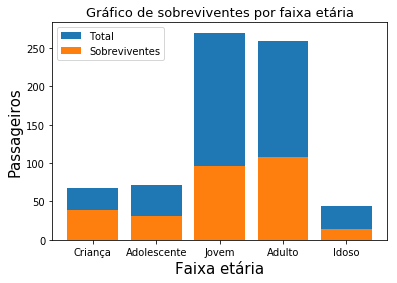

In [55]:
# Crio dois gráficos sobrepostos, comparando total de passageiros com sobreviventes por faixa etária
plt.bar([1, 2, 3, 4, 5], df_titanic.groupby('Age_int')['Age_int'].count(), tick_label=label_age)
plt.bar([1, 2, 3, 4, 5], df_survived.groupby('Age_int')['Age_int'].count(), tick_label=label_age)
plt.title('Gráfico de sobreviventes por faixa etária', fontsize=13)
# Labels para X e Y
plt.xlabel('Faixa etária', fontsize=15)
plt.ylabel('Passageiros', fontsize=15);
# Legendas
plt.legend(['Total', 'Sobreviventes']);

<i>Crianças tiveram a maior proporção de sobreviventes. Já idosos, jovens e adultos tiveram as menores proporções</i>

### Qual a média de sobreviventes por faixa etária?

In [56]:
# Realizo esse procedimento para que o label em X do gráfico de linha mais abaixo fique intuitivo

# Atribuo o label da faixa etária para as definições
age_definitions = label_age

# Crio dois vetores de strings, um equivalente ao dataframe total (df_titanic)
age_str = create_age_array(df_titanic['Age'], age_definitions)
# e outro ao dataframe de sobreviventes (df_survived)
age_survived_str = create_age_array(df_survived['Age'], age_definitions)

# Cria uma nova coluna 'Age_str' em cada dataframe
df_titanic['Age_str'] = age_str
df_survived['Age_str'] = age_survived_str

C:\Users\KassemZ\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


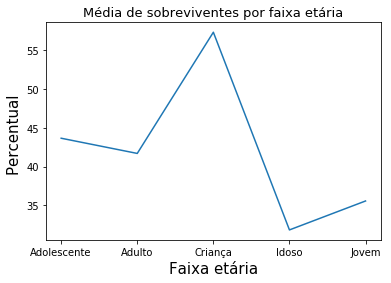

In [57]:
# Média de sobreviventes por faixa etária
fracs = (df_titanic.groupby('Age_str').mean()['Survived'])*100

# Crio um gráfico de linha para a média de sobreviventes por faixa etária
plt.plot(fracs)
plt.title('Média de sobreviventes por faixa etária', fontsize=13)
# Label de X e Y
plt.xlabel('Faixa etária', fontsize=15)
plt.ylabel('Percentual ', fontsize=15);

<i>Crianças e adolescentes apresentaram a maior média de sobreviventes, comparados as demais faixas etárias</i>

# Conclusão

## Limitações

Apesar das conclusões obtidas, a análise possui suas limitações. As informações contidas no <i>dataframe</i> correspondem aos dados de 891 dos 2.224 passageiros a bordo do Titanic. Além disso, ainda foi necessário deletar cerca de 177 linhas com valores nulos em campos que seriam analisados, como "Age" e "Embarked".

Portanto, não é possível assegurar que os resultados aqui alcançados são definitivos.

## Conclusões

Através da EDA foi possível identificar informações e fatores que, apesar de contidos no <i>dataframe</i>, não estavam explícitos.

Identificou-se que, de um total de 712 passageiros, apenas 288 sobreviveram. O ponto S (Southampton) embarcou a maior parte dos passageiros, sendo sua maioria de classe 3, enquanto que o ponto C (Cherbourg) embarcou em sua maioria passageiros de classe 1. Avaliou-se também que a maior média de sobreviventes embarcou em C.

Quanto ao status sócio-econômico, identifcou-se que a maior proporção de sobreviventes eram de classe 1, enquanto que a classe 3 teve o menor número de sobreviventes. Na análise de gênero, o maior número de sobreviventes eram do sexo feminino.

A análise por faixa etária identificou que a maior média de sobreviventes foram de crianças e adolescentes, ao passo que a menor média foram de idosos e jovens.